In [1]:
 !pip install numpy pandas scikit-learn matplotlib

In [35]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [36]:
# -------------------------------------------
# 1. Generate structured synthetic data
# -------------------------------------------
# 100 samples, 10 features (6 informative)
data, labels = make_classification(
    n_samples=100, n_features=10, n_informative=6,
    n_redundant=2, n_classes=2, random_state=42
)

In [37]:
# -------------------------------------------
# 2. Split data into training and testing sets
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [38]:
# -------------------------------------------
# 3. Standardize features
# -------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# -------------------------------------------
# 4. Define AIRS-like training with SVM
# -------------------------------------------
def airs_train(X_train, y_train, num_detectors=20):
    # Randomly select samples as detectors
    detector_indices = np.random.choice(len(X_train), num_detectors, replace=False)
    detectors = X_train[detector_indices]
    
    # Train SVM classifier on detectors
    svm = SVC(kernel='rbf', probability=True)
    svm.fit(detectors, y_train[detector_indices])
    
    return svm


In [40]:
# -------------------------------------------
# 5. Train AIRS-inspired model
# -------------------------------------------
svm_classifier = airs_train(X_train_scaled, y_train, num_detectors=30)

In [41]:
# -------------------------------------------
# 6. Evaluate the model
# -------------------------------------------
predictions = svm_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, predictions))

# Optional: Print basic accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20

Accuracy: 70.00%


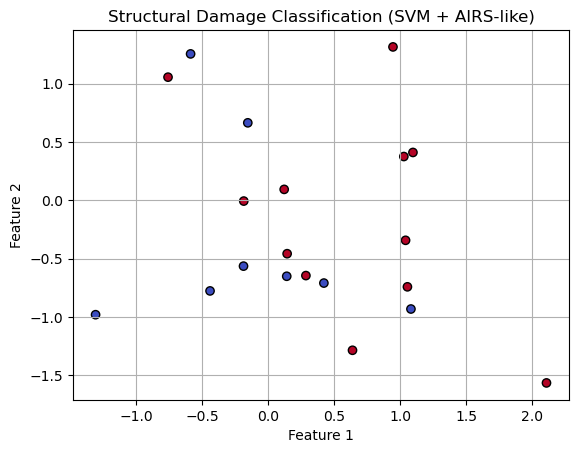

In [42]:
# -------------------------------------------
# 7. Optional: Visualize (using first 2 features)
# -------------------------------------------
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=predictions, cmap='coolwarm', edgecolor='k')
plt.title("Structural Damage Classification (SVM + AIRS-like)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [11]:
import numpy as np

In [5]:
data,labels = make_classification(n_samples =100 ,n_features = 10,
n_informative = 6 , n_redundant = 2, n_classes = 2,random_state=42)

In [6]:
x_train,x_test , y_train,y_test = train_test_split(data,labels,test_size = 0.2,random_state=42)

In [7]:
sc = StandardScaler()


In [8]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [12]:
# AIRS-SVM model building

def airs_train(x_train,y_train,num_detectors = 20):
    detectors_indices = np.random.choice(len(x_train),num_detectors,replace=False)
    detectors = x_train[detectors_indices]

    svm = SVC(kernel='rbf',probability = True)
    svm.fit(detectors,y_train[detectors_indices])

    return svm


In [13]:
svm_classifier = airs_train(x_train_scaled,y_train,num_detectors=30)

In [15]:
predictions = svm_classifier.predict(x_test_scaled)

print("classification report")
print(classification_report(y_test,predictions))
accuracy = np.mean(predictions==y_test)

print(f"Accuracy: {accuracy *100:.2f}%")





classification report
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.59      1.00      0.74        10

    accuracy                           0.65        20
   macro avg       0.79      0.65      0.60        20
weighted avg       0.79      0.65      0.60        20

Accuracy: 65.00%


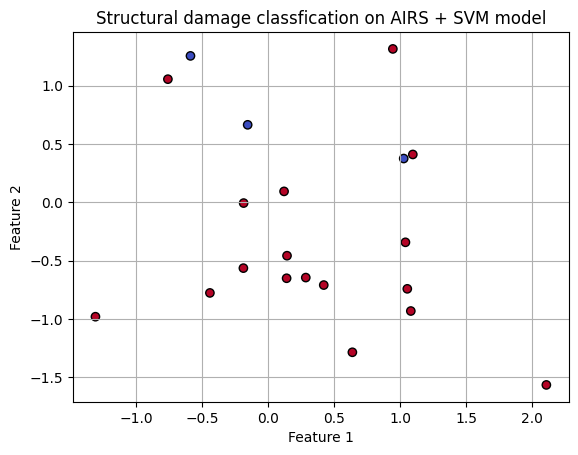

In [18]:
plt.scatter(x_test_scaled[:,0],x_test_scaled[:,1] , c = predictions , cmap = 'coolwarm',edgecolor = 'k')
plt.title("Structural damage classfication on AIRS + SVM model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=predictions, cmap='coolwarm', edgecolor='k')
# plt.title("Structural Damage Classification (SVM + AIRS-like)")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.grid(True)
# plt.show()